# Computing piecewise quasipolynomial formulas for plethysm coefficients

We simplify the piecewise quasipolynomial functions describing plethysm coefficients given by Kahle and Michalek. 

See the [notebook "plethysm with sym"](plethysm_with_sym.ipynb) for the description of the 'plethysm coefficients that are considered here and the meaning of the coordinates.

## Parsing and simplifying Kahle-Michalek output


For each of the families of plethysm coefficients they considered, Kahlke and Michalek obtained a description as  a list of pairs (quasipolynomial function, domain of vailidity), that appear in the ouput file as

variables ` -> ` quasipolynomial `: ` domain `;`

Here is an example of such a pair, coming from the coefficients of the plethysms $S_{1111}[S_k]$ (the variables here are $b_1$, $b_2$ and $s$):

```python
[b1, b2, s] -> ((((((1/2 - 1/3 * b1 - 1/24 * b1^2) + (-1/3 + 3/8 * b1 - 1/48 * b1^2) * b2 + (1/48 + 1/48 * b1) * b2^2) + (2/3 - 2/3 * b2) * floor((b1)/3)) + (1/3 - 1/3 * b2) * floor((1 + b1)/3)) + ((2/3 - 1/3 * b1) + floor((b1)/3)) * floor((b2)/3)) + (((1/3 - 2/3 * b1) + floor((b1)/3)) + floor((1 + b1)/3)) * floor((1 + b2)/3)) : (exists (e0 = floor((-2 + b1)/4), e1 = floor((b2)/4): 4e0 = -2 + b1 and 4e1 = b2 and b1 >= 2 and b2 >= 2 + b1 and s >= 1 + b1 + b2)) or (exists (e0 = floor((b2)/4), e1 = floor((-2 + b1 + b2)/4): s = b1 + b2 and 4e0 = b2 and 4e1 = -2 + b1 + b2 and b1 >= 2 and b2 >= 2 + b1)) or (exists (e0 = floor((b2)/4), e1 = floor((-2 + b1 + b2)/4): s = -1 + b1 + b2 and 4e0 = b2 and 4e1 = -2 + b1 + b2 and b1 >= 3 and b2 >= 2 + b1));
```
 
The first half of the above pair is the quasipolynomial formula:
```python
[b1, b2, s] -> ((((((1/2 - 1/3 * b1 - 1/24 * b1^2) + (-1/3 + 3/8 * b1 - 1/48 * b1^2) * b2 + (1/48 + 1/48 * b1) * b2^2) + (2/3 - 2/3 * b2) * floor((b1)/3)) + (1/3 - 1/3 * b2) * floor((1 + b1)/3)) + ((2/3 - 1/3 * b1) + floor((b1)/3)) * floor((b2)/3)) + (((1/3 - 2/3 * b1) + floor((b1)/3)) + floor((1 + b1)/3)) * floor((1 + b2)/3))
```

The second half of the pair describes the domain as a disjoint union of three subsets, that we will call "pieces": 

```python
(exists (e0 = floor((-2 + b1)/4), e1 = floor((b2)/4): 4e0 = -2 + b1 and 4e1 = b2 and b1 >= 2 and b2 >= 2 + b1 and s >= 1 + b1 + b2)) or (exists (e0 = floor((b2)/4), e1 = floor((-2 + b1 + b2)/4): s = b1 + b2 and 4e0 = b2 and 4e1 = -2 + b1 + b2 and b1 >= 2 and b2 >= 2 + b1)) or (exists (e0 = floor((b2)/4), e1 = floor((-2 + b1 + b2)/4): s = -1 + b1 + b2 and 4e0 = b2 and 4e1 = -2 + b1 + b2 and b1 >= 3 and b2 >= 2 + b1))
```
In this example, the domain has 3 pieces.

Piece 1:
```python
exists (e0 = floor((-2 + b1)/4), e1 = floor((b2)/4): 4e0 = -2 + b1 and 4e1 = b2 and b1 >= 2 and b2 >= 2 + b1 and s >= 1 + b1 + b2)
```
Piece 2:
```python
exists (e0 = floor((b2)/4), e1 = floor((-2 + b1 + b2)/4): s = b1 + b2 and 4e0 = b2 and 4e1 = -2 + b1 + b2 and b1 >= 2 and b2 >= 2 + b1)
```
Piece 3:
```python
exists (e0 = floor((b2)/4), e1 = floor((-2 + b1 + b2)/4): s = -1 + b1 + b2 and 4e0 = b2 and 4e1 = -2 + b1 + b2 and b1 >= 3 and b2 >= 2 + b1)
```

Each piece has the following structure:

quantified statement ` : ` linear equations and inequalites with integer coefficients

The quantified statements are all of the form:

> There exist $e_0$, $e_1$, ..., $e_m$ such that for all $i$, $e_i = \text{floor}(L_i/k_i)$`

where the $L_i$ are linear forms with integer coefficients in the variables $b_1$, $b_2$, ..., $s$ , and the $k_i$ are integers. 


The quantifiers are eliminated as follows: split each piece in subpieces defined by the values of each $L_i$ modulo $k_i$. (**this is not what we have done up to now, we considered the values of the $b_j$ modulo some numbers**). That is, the subpieces are the intersections of the pieces with the cosets of a full-rank sublattice of $\mathbb{Z}^n$.

For $e_i = \text{floor}(L_i/k_i)$, the variable $e_i$ is replaced in the equations and inequalities with $(L_i-a_i)/k_i$, for a subpiece where $L_i \equiv a_i \mod k_i$ where $0 \le a_i < k_i$.


**Example:** for piece 3, we have $L_0/k_0=b_2/4$ and $L_1/k_1=(b_1+b_2-2)/4$. The subpieces are defined by the values modulo $4$ of $b_2$ and $b_1+b_2$. 


After this simplification, the domain of each formula is described as a disjoint union of subpieces. Each subpiece is  described by modular conditions and a conjonction of equations and inequalities. The modular equation defines a lattice coset $C$. The equations and inequalities define a polyhedron $P$, that in many cases happen to be empty and is then discarded. Note that it may happen that the polyhedron and the lattice coset don't intersect, but it is not detected at this point. The subpieces are the sets $C \cap P$.


## Here comes the ansatz

For the function $f$ defined by formula $F$ on the pieces $C \cap P$, we define a new function $g$ (conjecturally equal to $f$) as follows:
 
 * for each subpiece $C \cap P$ whose $P$ has full-dimensional recession cone $R$, the function $g$ is defined on $C \cap R$ by $F$.
* Outside of the sets $C \cap R$, $g$ is 0.

Note that it is not even guaranteed that $g$ is well-defined.  We will check that $g$ coincides with indeed with $f$ (this will show at the same time that $g$ is well-defined).


### Calculations up to now.

In [1]:
load("Barvinok.sage") 
labels4 = ['1111', '211', '22', '31', '4']
labels3 = ['111', '21', '3'] 
#labels = labels4 + labels3
# BUG: if here you treat label3 AND label4, sage becomes confused with the variables.
labels = labels3 + labels4

## read
dir = "all-qpoly/"
def myreadfile(address):
    with open(address, 'r') as f:
        res = f.read()
    return res

qpoly_as_str = { label: myreadfile(dir + label + '.qpoly') for label in labels}

## Parse
bvs = { label: BarvinokFunction(qpoly_as_str[label]) for label in labels}

In [2]:
choosen = '1111'
bv = bvs[choosen]

In [3]:
print(bv.main_vars)
print(bv.mods)   # the moduli of the variables
## long:
output = bv.modRepresentation() 
## don't print

[b1, b2, s]
[4, 4, 1]


In [5]:
## Number of subpieces
print(add(len(subpiece) for subpiece in output.values()))

334


In [6]:
## Number of subpieces
all_subpieces = [(c, P) for c, pair in output.items() for (F, L) in pair for P in L  ]
len(all_subpieces)

446

Some subpieces have the same outlying polyehdron (but corresponf to different cosets).

In [7]:
all_polyhedra = [P for (c, P) in all_subpieces]
len(set(all_polyhedra))

78

In [8]:
def recession_cone(P): 
    r"""
    Return the recession cone of P, as a Polyhedron
    
    EXAMPLE::
    
        sage: P = Polyhedron(vertices=[(12, 12, 9)], 
        ....:                rays=[(4, 4, 3), (2, 3, 2), (1, 1, 1)])
        sage: recession_cone(P)
        A 3-dimensional polyhedron in QQ^3 defined as the convex hull of 1 vertex and 3 rays (use the .plot() method to plot)
    """
    return Polyhedron(rays = P.rays())

In [9]:
all_cones = [recession_cone(P) for P in all_polyhedra if P.dim()==P.ambient_dim()]
# even if P is full-dim, its recession cone may be not full-dim
# we filter to remove the degenerate recession cones
all_cones = [R for R in all_cones if R.dim() == R.ambient_dim()]
len(all_cones)

80

In [10]:
# we remove repetitions
all_cones = list(set(all_cones))
len(all_cones)

5

In [11]:
# each polyhedra: which cone does it belong to?
for (c, piece) in output.items():
    for (F, L) in piece:
        for P in L:
            for (i, R) in enumerate(all_cones):
                if (all(R.contains(v) for v in P.vertices() + P.rays())):
                    print(i, end="")
                    break
            else:
                print(c, F, P)

30032002022221411422112213310222220033210211411421233100332022200222141142211221331102002232003221211411421233312002022003221411112422123302222003232102411422112213311320222002003221411114221233020030022322212411114222213310033411422223312002022221121120222220033210214114212332003320222002221411422122133120200220033222121411421233131200202200322141124211212330222220033210241142211221331132022200200322141142112123302002200332221241142211221331

We represent the cones in different ways.

In [12]:
add(Cone(R).plot() for R in all_cones)

Graphics3d Object

**Only for 3-D cones**:
 We look for a better representation: we take the intersection with the plane with equation $x+y+z=1$ (where we use coordinates $x$, $y$).

In [13]:
def restriction(f):
    r"""
    Let ``f=(0, a, b, c)`` representing the inequality
    `0 \le a x + b y + cz`.
    Return the inequality obtained bu substituting `z` with `1 - x - y`
    which is:
    `(a-c) x + (b-c) y + c \ge 0`.
    It is represented with `(c, a-c, b-c)`.
    """
    (zero, a , b, c) = f
    if zero != 0:
        raise ValueError()
    return (c, a-c, b-c)

def trace(P):
    r"""Return the intersection of P with the plane with equations x+y+z=1.
    
    The coordinates in this plane are x and y.
    """
    return Polyhedron(ieqs = [restriction(f) for f in P.inequalities()])

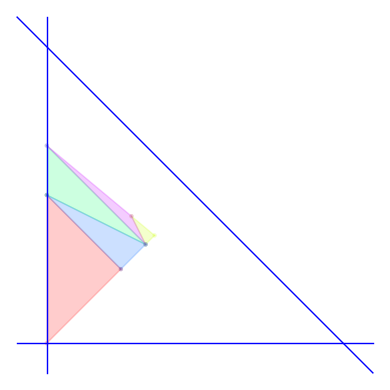

In [14]:
all_traces = [trace(R) for R in all_cones]
colors = rainbow(len(all_cones))
res = (add(Q.plot(color=c, alpha=0.2, axes=False) 
           for (Q,c) in zip(all_traces, colors)) 
      + line([(-0.1, 0), (1.1, 0)]) + line([(0, -0.1), (0, 1.1)]) 
       + line([(-0.1, 1.1), (1.1, -0.1)]) )
res
# alpha to see that there is no overlapping
# the lines are the traces of the coordinates planes

In [15]:
def poly_union(L):
    r"""Convex hull of the union polyehdra from the list L
    """
    return reduce(lambda P, Q: P.convex_hull(Q), L)

## joining everything

We check that, for each recession cone and each coset, there is only one formula that corresponds to them. 

In [16]:
def cone_contains_polyhedron(C, P):
    r"""Return if the polyhedron ``P`` is contained in the cone ``C``
    """
    return all(C.contains(r) for r in P.vertices() + P.rays())

def has_degenerated_recession_cone(P):
    r"""return ``True`` if the polyhedron ``P`` has its recession cone not full-dim"""
    return recession_cone(P).dim() < P.ambient_dim()
    

formulas = {i:{} for (i,R) in enumerate(all_cones)}
for (c, pair) in output.items():
    for (F, L) in pair:
        for P in L:
            if not has_degenerated_recession_cone(P):
                for (i, R) in enumerate(all_cones):
                    if cone_contains_polyhedron(R, P):
                        if c in formulas[i].keys():
                            print("Several formulas are associated to piece {i} and coset {c}"
                                 .format(i=i, c=c))
                            print(F)
                        else:
                            formulas[i][c] = F
                        break
                else:
                    print("A polyhedron is contained in none of the cones.")      

For each chamber, we decompose the coerresponding quasipolynomial $F$ as: $F=P+M$ where $P$ is the quasipolynomial on the zero coset, and $M$ is a modifier (so $M$ is defined as $F-P$). The advantage is that $M$ is much smaller than $F$ and $P$. 

In [17]:
for (i, phi) in formulas.items():
    print("Chamber", i)
    print("====")
    phi0 = phi[0,0,0]
    print("On the zero coset:")
    print(phi0)
    print("Modifier for the other cosets:")
    for c, F in phi.items():
        print("coset ",c)
        print(expand(F - phi0))
        print("---")

Chamber 0
====
On the zero coset:
1/48*(b1 + 1)*b2^2 - 1/24*b1^2 - 1/3*b1*(b2 - 1) - 1/48*(b1^2 - 18*b1 + 16)*b2 - 1/3*b1 + 1/3*b2
Modifier for the other cosets:
coset  (0, 0, 0)
0
---
coset  (0, 1, 0)
3/16*b1 - 1/8*b2 + 5/48
---
coset  (0, 2, 0)
-1/12
---
coset  (0, 3, 0)
3/16*b1 - 1/8*b2 + 3/16
---
coset  (1, 0, 0)
1/16*b2 + 1/24
---
coset  (1, 1, 0)
1/16*b1 + 1/16*b2 - 7/48
---
coset  (1, 2, 0)
1/16*b2 - 7/24
---
coset  (1, 3, 0)
1/16*b1 + 1/16*b2 + 17/48
---
coset  (2, 0, 0)
1/6
---
coset  (2, 1, 0)
3/16*b1 - 1/8*b2 - 7/48
---
coset  (2, 2, 0)
-1/12
---
coset  (2, 3, 0)
3/16*b1 - 1/8*b2 - 19/48
---
coset  (3, 0, 0)
1/16*b2 + 3/8
---
coset  (3, 1, 0)
1/16*b1 + 1/16*b2 + 5/48
---
coset  (3, 2, 0)
1/16*b2 + 1/24
---
coset  (3, 3, 0)
1/16*b1 + 1/16*b2 + 7/16
---
Chamber 1
====
On the zero coset:
-1/24*b1^3 + 1/48*(3*b1 + 29)*b2^2 + 1/24*b2^3 - 1/3*(b1 - b2 - 1)*s^2 - 1/9*(4*b1 + 5*b2 + 2*s - 1)*b1 - 1/9*(2*b1 + 4*b2 + s - 2)*b1 + 19/24*b1^2 - 1/48*(3*b1^2 - 86*b1 + 48)*b2 - 1/3*(2*b1 +

### Now repeat the above calculations ...

changing just the data: `chosen`

## Only for dim. 3 (3 variables, e.g. b1, b2, s)

We represent these Polyhedra.

In [19]:
if choosen in labels4:
    allP=add(P.plot() for P in all_polyhedra)
    allP.bounding_box()
    from sage.plot.colors import rainbow
    R = rainbow(len(all_polyhedra))
    P0 = Polyhedron(ieqs=[(1, 1, 0,0), (1, 0,1,0), (1,0,0,1),
                                      (30, -1, 0, 0), (30, 0, -1, 0), (30, 0, 0, -1)])
    boundedP = add(P.intersection(P0).plot(color=c) for (P, c) in zip(all_polyhedra,R))
    boundedP.show()

Graphics3d Object